### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Dataset

In [3]:
data = pd.read_csv("filtered_data.csv")
data.head()

,RNAInterID,Interactor1.Symbol,Category1,Species1,Interactor2.Symbol,Category2,Species2,Raw_ID1,Raw_ID2,score,predict
0,RR00670755,Gm24029,snoRNA,Mus musculus,U5,snRNA,Mus musculus,Ensembl:ENSMUSG00000065862,Ensembl:ENSMUSG00000070228,0.23,NaN
1,RR00670756,Gm24029,snoRNA,Mus musculus,U5,snRNA,Mus musculus,Ensembl:ENSMUSG00000065862,Ensembl:ENSMUSG00000075763,0.23,NaN
2,RR00670754,Gm24029,snoRNA,Mus musculus,U5,snRNA,Mus musculus,Ensembl:ENSMUSG00000065862,Ensembl:ENSMUSG00000064881,0.23,NaN
3,RR00673515,Gm24455,snoRNA,Mus musculus,U5,snRNA,Mus musculus,Ensembl:ENSMUSG00000065282,Ensembl:ENSMUSG00000064430,0.23,NaN
4,RR00673516,Gm24455,snoRNA,Mus musculus,U5,snRNA,Mus musculus,Ensembl:ENSMUSG00000065282,Ensembl:ENSMUSG00000064881,0.23,NaN


### Data Reduction

In [5]:
columns_to_drop = ["Raw_ID1", "Raw_ID2"]
data = data.drop(columns=columns_to_drop)

### Data Cleaning/Wrangling

In [7]:
# Handling missing values
data.fillna(value=0, inplace=True) # Replace NaN with 0 or a suitable value

# Convert columns to appropriate data types if needed
data['score'] = data['score'].astype(float)

### EDA Exploratory Data Analysis

In [8]:
# Displaying the first few rows of the dataset
print(data.head())

# Getting an overview of the dataset
print(data.info())

# Checking basic statistics
print(data.describe())

   RNAInterID Interactor1.Symbol Category1      Species1 Interactor2.Symbol  \
0  RR00670755            Gm24029    snoRNA  Mus musculus                 U5   
1  RR00670756            Gm24029    snoRNA  Mus musculus                 U5   
2  RR00670754            Gm24029    snoRNA  Mus musculus                 U5   
3  RR00673515            Gm24455    snoRNA  Mus musculus                 U5   
4  RR00673516            Gm24455    snoRNA  Mus musculus                 U5   

  Category2      Species2  score predict  
0     snRNA  Mus musculus   0.23       0  
1     snRNA  Mus musculus   0.23       0  
2     snRNA  Mus musculus   0.23       0  
3     snRNA  Mus musculus   0.23       0  
4     snRNA  Mus musculus   0.23       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8984127 entries, 0 to 8984126
Data columns (total 9 columns):
 #   Column              Dtype  
---  ------              -----  
 0   RNAInterID          object 
 1   Interactor1.Symbol  object 
 2   Category1         

### EDA Univariate Analysis

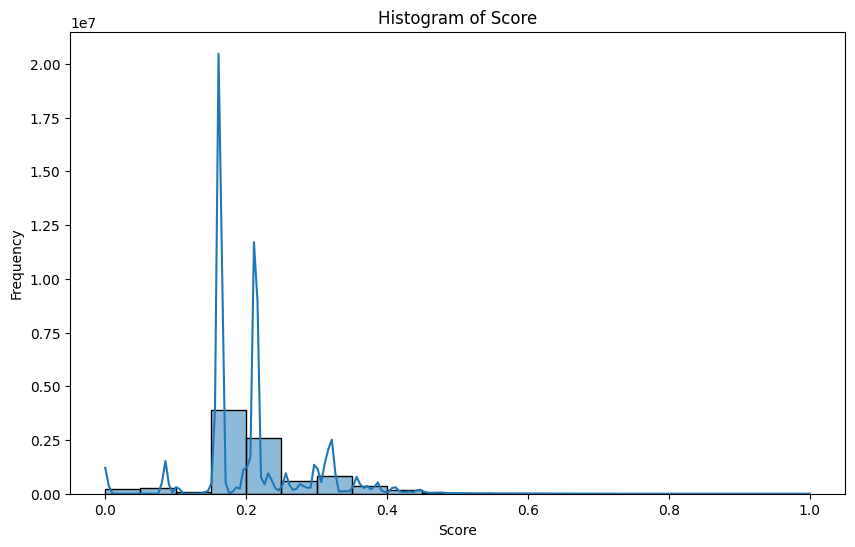

In [9]:
# Plotting histograms for numerical variables
plt.figure(figsize=(10, 6))
sns.histplot(data['score'], bins=20, kde=True)
plt.title('Histogram of Score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

### EDA Bivariate Analysis

C:\Users\syxrw\AppData\Local\Temp\ipykernel_8820\3831621861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['predict'] = pd.to_numeric(data['predict'], errors='coerce')  # Convert non-numeric values to NaN


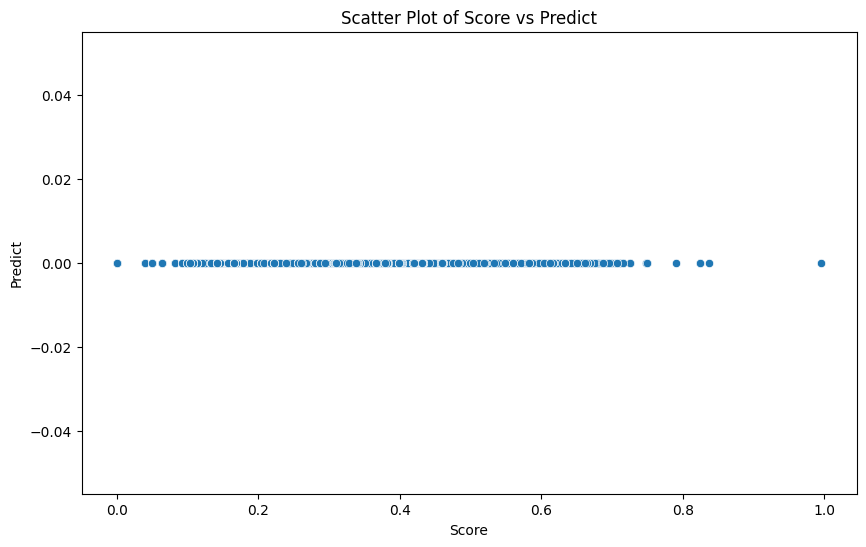

In [15]:
data['predict'] = pd.to_numeric(data['predict'], errors='coerce')  # Convert non-numeric values to NaN
data = data.dropna(subset=['predict']) # Drop rows with NaN in 'predict' column

# Creating scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='score', y='predict')
plt.title('Scatter Plot of Score vs Predict')
plt.xlabel('Score')
plt.ylabel('Predict')
plt.show()